In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [11]:
#load the .csv into a data frame df
df = pd.read_csv('C:/Users/elibe/OneDrive/Desktop/SpringBoard Assignments/OnlineFraudData.csv')

In [14]:
# examine the data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
# check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
#check for duplicate rows
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [8]:
#examine descriptive statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
import pandas as pd

# Numerical columns for which we want to calculate statistics
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate basic statistics
statistics = df[numerical_columns].describe()

# Calculate mode separately because pandas 'describe' function does not include mode
mode = df[numerical_columns].mode().iloc[0]

# Add mode to the statistics DataFrame
statistics.loc['mode'] = mode

# Print the statistics
print(statistics)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   
mode   1.900000e+01  1.000000e+07   0.000000e+00    0.000000e+00   

       oldbalanceDest  newbalanceDest  
count    6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  
std      3.399180e+06    3.674129e+06  
min      0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  
75%      9.430367e+05    1.111909e+06  

In [11]:
import pandas as pd

# Categorical columns for which we want to explore unique values and frequencies
categorical_columns = ['type', 'nameOrig', 'nameDest']

# Explore unique values and their frequencies
for column in categorical_columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    
    print(f"\nColumn: {column}")
    print("Number of unique values:", len(unique_values))
    print("Unique values:", unique_values)
    print("Value counts:")
    print(value_counts)


Column: type
Number of unique values: 5
Unique values: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Value counts:
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Column: nameOrig
Number of unique values: 6353307
Unique values: ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
Value counts:
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

Column: nameDest
Number of unique values: 2722362
Unique values: ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']
Value counts:
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431

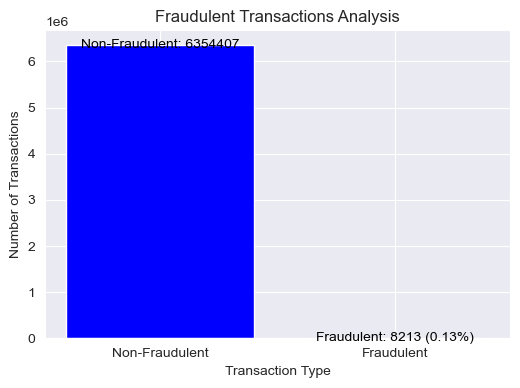

In [13]:
#compare proportion of fraudulent and non-fraudulent transactions

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of fraudulent and non-fraudulent transactions
fraud_counts = df['isFraud'].value_counts()

# Calculate the percentage of fraudulent transactions
total_transactions = len(df)
fraud_percentage = (fraud_counts[1] / total_transactions) * 100

# Create a bar plot to visualize the occurrence of fraudulent transactions
plt.figure(figsize=(6, 4))
plt.bar(['Non-Fraudulent', 'Fraudulent'], fraud_counts, color=['blue', 'red'])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Fraudulent Transactions Analysis')
plt.text(0, fraud_counts[0] + 1000, f"Non-Fraudulent: {fraud_counts[0]}", ha='center', va='center', color='black')
plt.text(1, fraud_counts[1] + 1000, f"Fraudulent: {fraud_counts[1]} ({fraud_percentage:.2f}%)", ha='center', va='center', color='black')
plt.show()

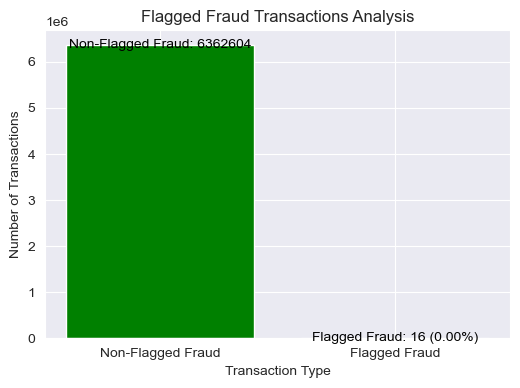

In [14]:
#compare the proportion of flagged and non-flagged transactions

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of flagged fraud and non-flagged fraud transactions
flagged_fraud_counts = df['isFlaggedFraud'].value_counts()

# Calculate the percentage of flagged fraud transactions
total_transactions = len(df)
flagged_fraud_percentage = (flagged_fraud_counts[1] / total_transactions) * 100

# Create a bar plot to visualize the occurrence of flagged fraud transactions
plt.figure(figsize=(6, 4))
plt.bar(['Non-Flagged Fraud', 'Flagged Fraud'], flagged_fraud_counts, color=['green', 'red'])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Flagged Fraud Transactions Analysis')
plt.text(0, flagged_fraud_counts[0] + 1000, f"Non-Flagged Fraud: {flagged_fraud_counts[0]}", ha='center', va='center', color='black')
plt.text(1, flagged_fraud_counts[1] + 1000, f"Flagged Fraud: {flagged_fraud_counts[1]} ({flagged_fraud_percentage:.2f}%)", ha='center', va='center', color='black')
plt.show()

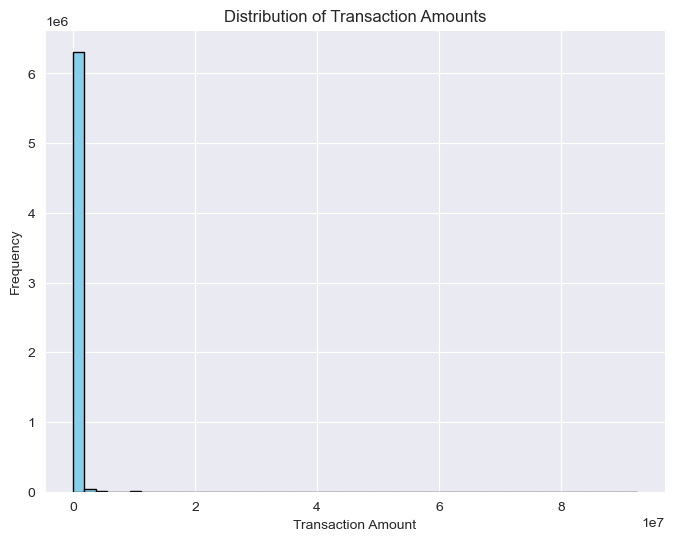

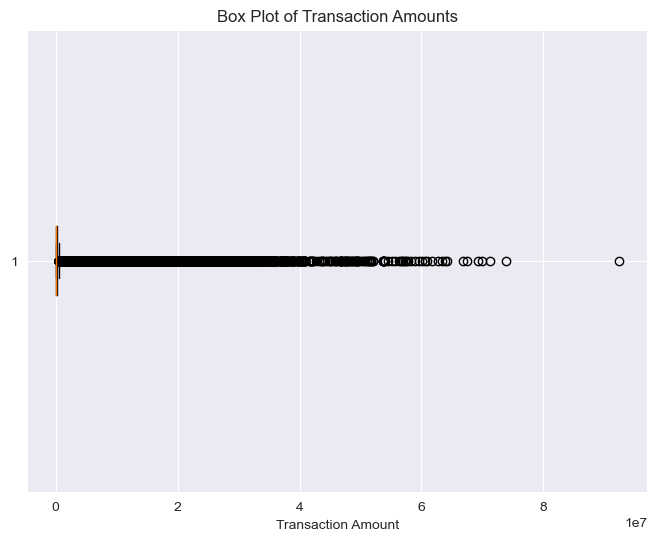

In [15]:
# Visualize the distribution of Transaction amounts

import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of transaction amounts

plt.figure(figsize=(8, 6))
plt.hist(df['amount'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Create a box plot to visualize the distribution of transaction amounts
plt.figure(figsize=(8, 6))
plt.boxplot(df['amount'], vert=False)
plt.xlabel('Transaction Amount')
plt.title('Box Plot of Transaction Amounts')
plt.show()

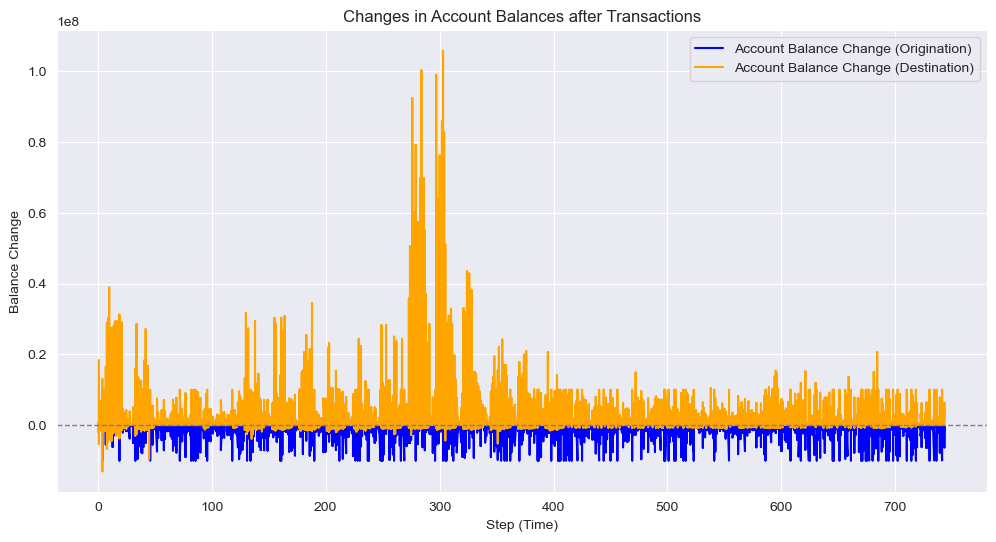

In [16]:
# Visualize post-transaction account balances

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the changes in account balances after transactions
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Create line plots to visualize the changes in account balances after transactions
plt.figure(figsize=(12, 6))
plt.plot(df['step'], df['balance_change_orig'], label='Account Balance Change (Origination)', color='blue')
plt.plot(df['step'], df['balance_change_dest'], label='Account Balance Change (Destination)', color='orange')
plt.axhline(y=0, color='gray', linestyle='dashed', linewidth=1)
plt.xlabel('Step (Time)')
plt.ylabel('Balance Change')
plt.title('Changes in Account Balances after Transactions')
plt.legend()
plt.grid(True)
plt.show()

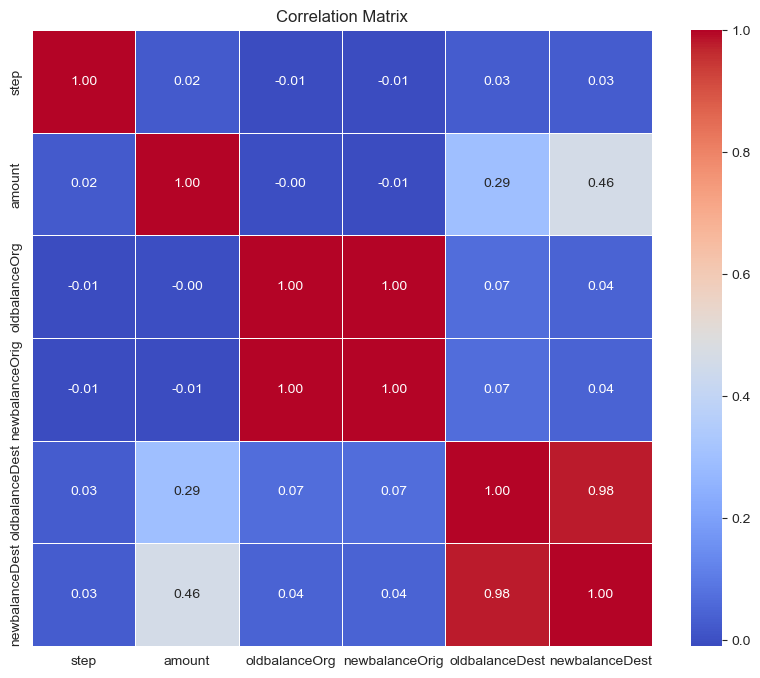

In [17]:
# create correlation matrix for numerical columns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for which we want to calculate the correlation
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

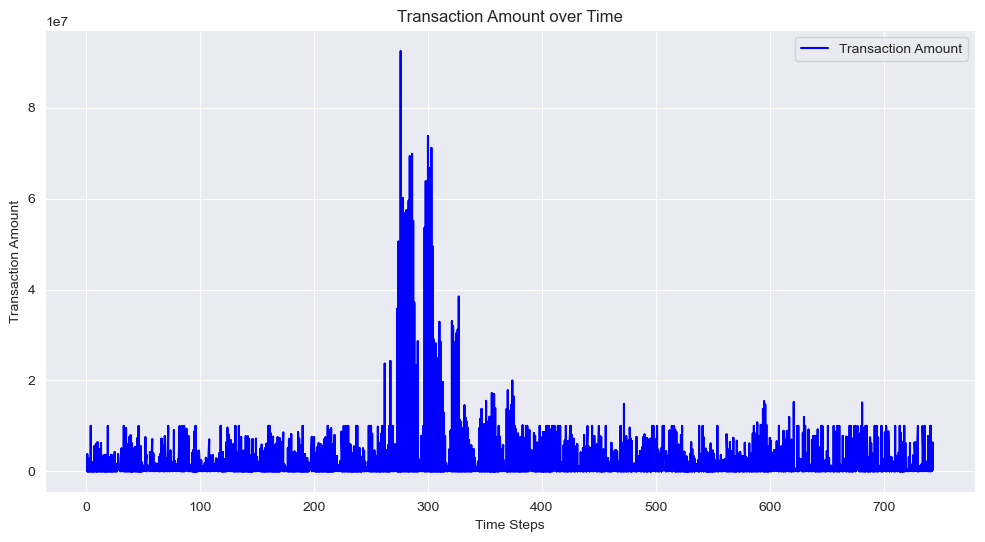

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# If your dataframe is named differently, replace 'df' with the correct variable name throughout the script.

# Sort the dataframe by the 'step' column to ensure data is in chronological order
df_sorted = df.sort_values('step')

# Create line plots to visualize time-based patterns
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['step'], df_sorted['amount'], label='Transaction Amount', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount over Time')
plt.legend()
plt.grid(True)
plt.show()
#This script will create a line plot to visualize how the transaction amount changes over time. The x-axis represents the 
#time steps, assuming the 'step' column represents time, and the y-axis represents the transaction amount.

#By visualizing the transaction amount over time, you can identify trends or patterns that may emerge. You may also be 
#able to spot potential anomalies or irregularities in the transaction amount that could indicate unusual behavior.

#To gain more insights, you can extend this analysis by plotting other numerical columns over time, 
#such as 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'. This will allow you to observe 
#changes in account balances and other transaction-related metrics over time.

#If the dataset contains a large number of time steps, you might consider aggregating the data into larger time 
#intervals (e.g., daily, weekly) to reduce the granularity of the plot and better visualize long-term trends. 
#Pandas' groupby and resample functions can be helpful for such data aggregation.

#Remember to ensure that the 'step' column is in the correct datetime format if it represents time, as this will 
#ensure proper ordering and visualization in the time-based plot.


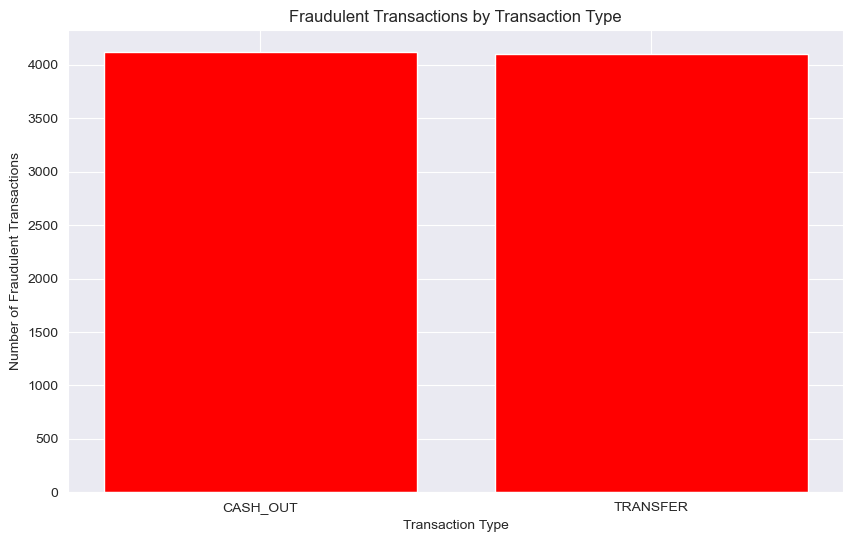

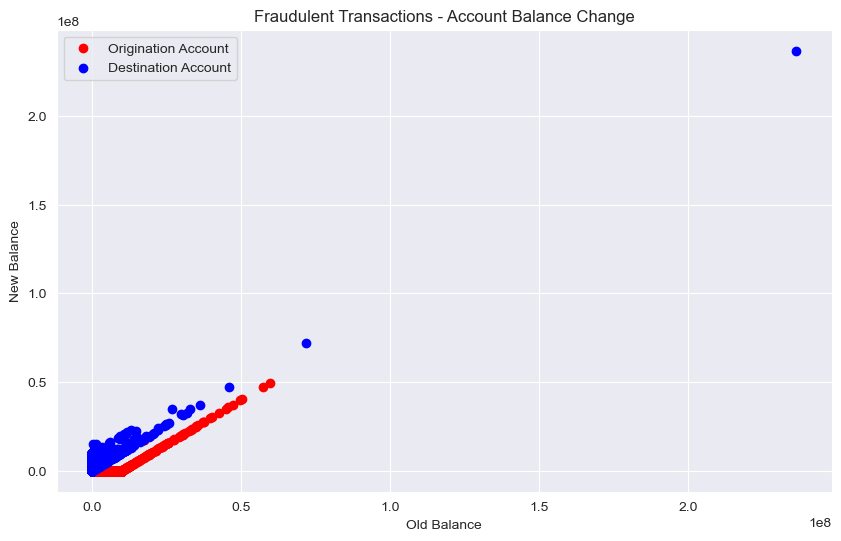

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# If your dataframe is named differently, replace 'df' with the correct variable name throughout the script.

# Filter the dataframe to include only fraud transactions
fraud_df = df[df['isFraud'] == 1]

# Visualize fraud patterns using bar plots
plt.figure(figsize=(10, 6))
plt.bar(fraud_df['type'].value_counts().index, fraud_df['type'].value_counts().values, color='red')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Transaction Type')
plt.show()

# Visualize fraud patterns using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(fraud_df['oldbalanceOrg'], fraud_df['newbalanceOrig'], color='red', label='Origination Account')
plt.scatter(fraud_df['oldbalanceDest'], fraud_df['newbalanceDest'], color='blue', label='Destination Account')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.title('Fraudulent Transactions - Account Balance Change')
plt.legend()
plt.grid(True)
plt.show()

#In this script:

#We first filter the dataframe to include only fraud transactions (isFraud == 1).
#We then visualize fraud patterns using bar plots to show the number of fraudulent transactions for each transaction type. 
#This will help identify if certain transaction types are more prone to fraud than others.
#Next, we use scatter plots to visualize the changes in account balances (both originating and destination accounts) 
#for fraud transactions. The scatter plots show points for each fraud transaction, where the x-axis represents the 
#old balance, and the y-axis represents the new balance. The red points represent changes in the originating account 
#balances, while the blue points represent changes in the destination account balances. 
#This visualization can help identify any specific trends or anomalies in the account balance changes for fraudulent 
#transactions.
#By visualizing fraud patterns using bar plots and scatter plots, you may be able to identify common characteristics or 
#behaviors associated with fraudulent activity. This can provide valuable insights for fraud detection and prevention 
#strategies. Keep in mind that the effectiveness of these visualizations will depend on the characteristics and size of 
#your dataset. You may need to perform additional data preprocessing or use more advanced visualization techniques for 
#more complex patterns or larger datasets.

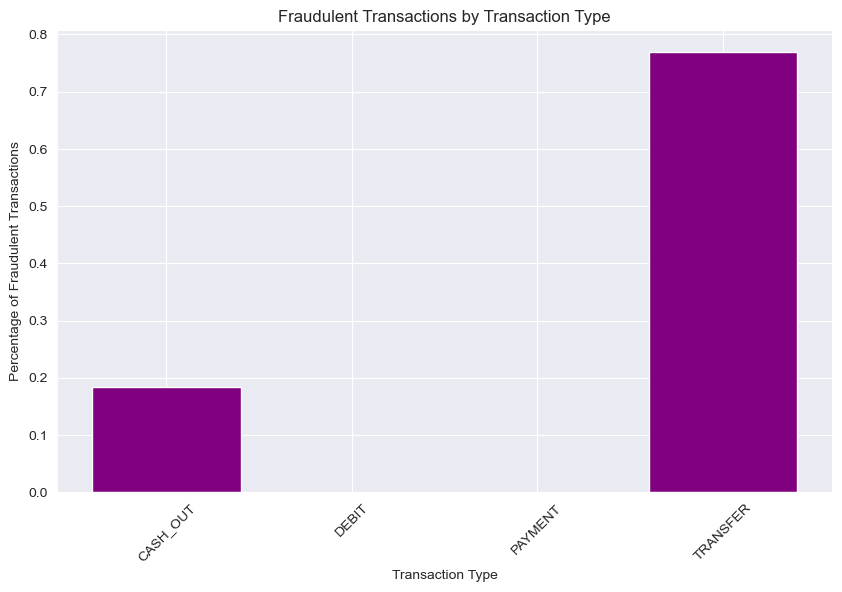

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# If your dataframe is named differently, replace 'df' with the correct variable name throughout the script.

# Calculate the total number of transactions for each transaction type
transaction_counts = df['type'].value_counts()

# Calculate the number of fraudulent transactions for each transaction type
fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()

# Calculate the percentage of fraudulent transactions for each transaction type
fraud_percentage = (fraud_counts / transaction_counts) * 100

# Create a bar plot to visualize the distribution of transaction types and their fraud percentages
plt.figure(figsize=(10, 6))
plt.bar(fraud_percentage.index, fraud_percentage.values, color='purple')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Transaction Type')
plt.xticks(rotation=45)
plt.show()

#In this script:

#We calculate the total number of transactions for each transaction type using the value_counts() function on the 'type' column.
#We calculate the number of fraudulent transactions for each transaction type by filtering the dataframe where 'isFraud' 
#is equal to 1 and then using value_counts() on the 'type' column.
#We calculate the percentage of fraudulent transactions for each transaction type by dividing the fraud counts by the total
#transaction counts and multiplying by 100.
#Finally, we create a bar plot to visualize the distribution of transaction types and their respective percentages of 
#fraudulent transactions.
#The bar plot will display each transaction type on the x-axis and the corresponding percentage of fraudulent transactions 
#on the y-axis. This visualization will help you identify if certain transaction types are more prone to fraud than others.

#By analyzing the distribution of transaction types and their fraud percentages, you can gain insights into potential risk 
#areas and focus your fraud detection and prevention efforts accordingly. Keep in mind that the effectiveness of this 
#analysis depends on the quality and representativeness of the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming your dataframe is named 'df'
# If your dataframe is named differently, replace 'df' with the correct variable name throughout the script.

# Drop unnecessary columns (e.g., 'nameOrig', 'nameDest') that may not contribute to the model
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Encode categorical 'type' column to numerical
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Split the data into features (X) and the target variable (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a random forest classifier and fit the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict the probabilities of class 1 (fraudulent) for test set
y_pred_probs = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Calculate Precision-Recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
average_precision = average_precision_score(y_test, y_pred_probs)

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Create Precision-Recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

#In this script:

#We drop unnecessary columns ('nameOrig', 'nameDest') that may not contribute to the model.
#We encode the categorical 'type' column to numerical using LabelEncoder.
#We split the data into features (X) and the target variable (y).
#We split the data into training and test sets.
#We scale the features to have zero mean and unit variance using StandardScaler.
#We create a Random Forest classifier and fit the model on the training data.
#We predict the probabilities of class 1 (fraudulent) for the test set using the trained model.
#We calculate the ROC curve and AUC score to evaluate the model's performance for binary classification.
#We calculate the Precision-Recall curve and average precision score to evaluate the model's performance, 
#especially for imbalanced datasets.
#Finally, we visualize the ROC curve and Precision-Recall curve to assess the model's performance. The ROC curve shows 
#the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). 
#The Precision-Recall curve shows the trade-off between precision and recall. Higher values of the AUC score (closer to 1) 
#and average precision score indicate better model performance.

#Keep in mind that this is a basic example, and in a real-world scenario, you might need to perform more comprehensive 
#data preprocessing, feature engineering, hyperparameter tuning, and consider other machine learning algorithms for 
#optimal performance. Additionally, the evaluation of the model should be conducted using cross-validation to get more 
#reliable performance estimates.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming your dataframe is named 'df'
# If your dataframe is named differently, replace 'df' with the correct variable name throughout the script.

# Drop unnecessary columns (e.g., 'nameOrig', 'nameDest') that may not contribute to the model
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Encode categorical 'type' column to numerical
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Split the data into features (X) and the target variable (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a random forest classifier and fit the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get the feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a dataframe to hold the feature importances with their respective feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by feature importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Visualize feature importance using a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Fraud')
plt.show()

#In this script:

#We drop unnecessary columns ('nameOrig', 'nameDest') that may not contribute to the model.
#We encode the categorical 'type' column to numerical using LabelEncoder.
#We split the data into features (X) and the target variable (y).
#We split the data into training and test sets.
#We scale the features to have zero mean and unit variance using StandardScaler.
#We create a Random Forest classifier and fit the model on the training data.
#We extract the feature importances from the trained model.
#We create a dataframe to hold the feature importances with their respective feature names.
#We sort the dataframe by feature importance in descending order.
#Finally, we visualize the feature importances using a horizontal bar plot.
#The horizontal bar plot will display each feature on the y-axis and its corresponding importance on the x-axis.
#This visualization allows you to quickly identify which variables contribute most to predicting fraud based on their
#importance scores.

#Feature importance provides valuable insights into which features are most relevant for the machine learning model's 
#decision-making process. Understanding feature importance can help you prioritize certain features during feature 
#engineering and focus your efforts on the most informative variables.